| **Inicio** | **Siguiente 2** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏩](./2_%20Redes_Neuronales.ipynb)|

# **1. Gradiente Descendente Paso a Paso con Python: Un Algoritmo de Optimización para Machine Learning**

## **Introducción**

¡Por supuesto! El Gradiente Descendente es un algoritmo de optimización ampliamente utilizado en machine learning para encontrar los valores óptimos de los parámetros de un modelo, minimizando una función de costo. Te explicaré paso a paso cómo funciona este algoritmo utilizando Python, ejemplos y gráficas para ilustrar cada paso.

**Paso 1: Definición del Problema y Función de Costo**

Supongamos que estás trabajando en un problema de regresión lineal, y tu objetivo es encontrar los coeficientes `m` y `b` en la ecuación `y = mx + b` que mejor se ajusten a tus datos. Para esto, necesitas definir una función de costo que mida qué tan bien se ajusta tu modelo a los datos. Una función comúnmente usada es el error cuadrático medio (MSE):

**Paso 2: Inicialización de Parámetros**

Comenzamos con valores iniciales para los parámetros que queremos optimizar (`m` y `b`, en este caso). También definimos una tasa de aprendizaje (`learning_rate`), que controla el tamaño de los pasos que damos en dirección del gradiente.

**Paso 3: Cálculo del Gradiente**

Calculamos el gradiente de la función de costo con respecto a los parámetros. Esto nos indica la dirección en la que debemos ajustar los parámetros para reducir el valor de la función de costo. En este caso, necesitamos calcular las derivadas parciales de la función de costo con respecto a `m` y `b`.

**Paso 4: Actualización de Parámetros**

Actualizamos los parámetros en la dirección opuesta al gradiente multiplicado por la tasa de aprendizaje. Esto nos ayuda a mover los parámetros hacia valores que reduzcan la función de costo.

**Paso 5: Iteración del Algoritmo**

Iteramos el proceso de cálculo del gradiente y actualización de parámetros varias veces para que los parámetros converjan hacia los valores óptimos.

**Paso 6: Visualización de Resultados**

Finalmente, puedes visualizar cómo el ajuste del modelo mejora en cada iteración al trazar los datos originales y la línea de regresión en el mismo gráfico.

Iteration 1/100 - Cost: 36.34429444894749
Iteration 2/100 - Cost: 11.08220615977718
Iteration 3/100 - Cost: 6.510906307092021
Iteration 4/100 - Cost: 5.666895729198242
Iteration 5/100 - Cost: 5.494518910375942
Iteration 6/100 - Cost: 5.443354783676386
Iteration 7/100 - Cost: 5.414252812933018
Iteration 8/100 - Cost: 5.389350324180397
Iteration 9/100 - Cost: 5.365427140360474
Iteration 10/100 - Cost: 5.341900681653588
Iteration 11/100 - Cost: 5.31866351002009
Iteration 12/100 - Cost: 5.295693803512961
Iteration 13/100 - Cost: 5.2729851902875735
Iteration 14/100 - Cost: 5.250534109211305
Iteration 15/100 - Cost: 5.228337532803284
Iteration 16/100 - Cost: 5.2063925567550875
Iteration 17/100 - Cost: 5.184696325684119
Iteration 18/100 - Cost: 5.163246019456409
Iteration 19/100 - Cost: 5.142038850423277
Iteration 20/100 - Cost: 5.121072062627323
Iteration 21/100 - Cost: 5.1003429313665105
Iteration 22/100 - Cost: 5.07984876282608
Iteration 23/100 - Cost: 5.059586893725946
Iteration 24/100 - 

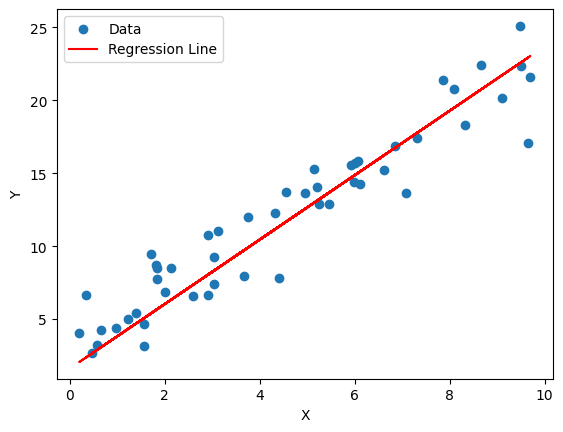

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos hipotéticos
np.random.seed(42)
x = np.random.rand(50) * 10
y = 2 * x + 3 + np.random.randn(50) * 2  # y = 2x + 3 + ruido

# Función de costo (Error Cuadrático Medio)
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Cálculo del gradiente
def compute_gradients(x, y, m, b):
    y_pred = m * x + b
    dm = -2 * np.mean(x * (y - y_pred))
    db = -2 * np.mean(y - y_pred)
    return dm, db

# Actualización de parámetros
def update_parameters(m, b, dm, db, learning_rate):
    m -= learning_rate * dm
    b -= learning_rate * db
    return m, b

# Parámetros iniciales
m = 0.0
b = 0.0
learning_rate = 0.01

# Iteraciones del algoritmo
num_iterations = 100
for i in range(num_iterations):
    dm, db = compute_gradients(x, y, m, b)
    m, b = update_parameters(m, b, dm, db, learning_rate)
    cost = mean_squared_error(y, m * x + b)
    print(f"Iteration {i+1}/{num_iterations} - Cost: {cost}")

# Visualización de resultados
plt.scatter(x, y, label='Data')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Estos pasos representan el proceso del Gradiente Descendente para ajustar una regresión lineal simple. En cada iteración, los valores de `m` y `b` se ajustan para minimizar la función de costo, y al final obtienes la línea de regresión que mejor se ajusta a tus datos. Recuerda que el ejemplo es simplificado, y en situaciones reales, podrían usarse variaciones del Gradiente Descendente y técnicas más avanzadas para lograr una convergencia más rápida y estable.

## **Optimizando un modelo de regresión lineal**

¡Por supuesto! Optimizar un modelo de regresión lineal implica encontrar los valores óptimos de los coeficientes de la ecuación lineal para que el modelo se ajuste mejor a los datos observados. Usaremos el método de Gradiente Descendente para optimizar el modelo. Aquí tienes una explicación detallada con ejemplos y gráficas.

**Paso 1: Definición del Problema y Función de Costo**

Supongamos que tenemos un conjunto de datos que relaciona la cantidad de horas de estudio (`x`) con el puntaje obtenido en un examen (`y`). Queremos ajustar un modelo de regresión lineal de la forma `y = mx + b`, donde `m` es la pendiente y `b` es la intersección en el eje y.

Primero, definimos una función de costo que medirá la diferencia entre las predicciones del modelo y los valores reales:

In [7]:
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

**Paso 2: Preparación de Datos y Visualización**

Generamos datos de ejemplo y los visualizamos para entender cómo se distribuyen:

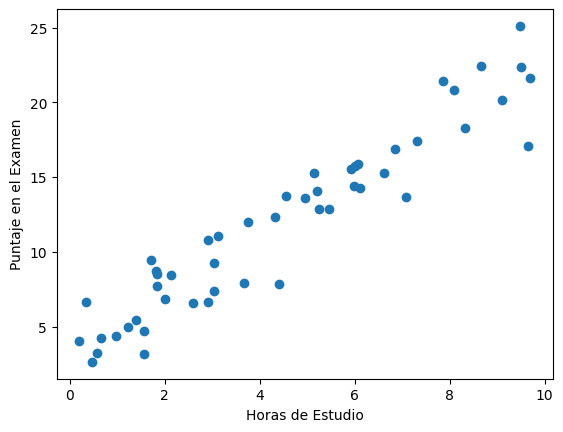

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.rand(50) * 10
y = 2 * x + 3 + np.random.randn(50) * 2  # y = 2x + 3 + ruido

plt.scatter(x, y)
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.show()

**Paso 3: Inicialización de Parámetros y Tasa de Aprendizaje**

Definimos valores iniciales para los coeficientes `m` y `b`, así como una tasa de aprendizaje:

In [9]:
m = 0.0
b = 0.0
learning_rate = 0.01

**Paso 4: Entrenamiento del Modelo**

Utilizamos el Gradiente Descendente para iterativamente ajustar los parámetros del modelo:

In [10]:
num_iterations = 100

for i in range(num_iterations):
    y_pred = m * x + b
    dm = -2 * np.mean(x * (y - y_pred))
    db = -2 * np.mean(y - y_pred)
    m -= learning_rate * dm
    b -= learning_rate * db
    cost = mean_squared_error(y, y_pred)
    print(f"Iteration {i+1}/{num_iterations} - Cost: {cost}")

Iteration 1/100 - Cost: 176.47025720335813
Iteration 2/100 - Cost: 36.34429444894749
Iteration 3/100 - Cost: 11.08220615977718
Iteration 4/100 - Cost: 6.510906307092021
Iteration 5/100 - Cost: 5.666895729198242
Iteration 6/100 - Cost: 5.494518910375942
Iteration 7/100 - Cost: 5.443354783676386
Iteration 8/100 - Cost: 5.414252812933018
Iteration 9/100 - Cost: 5.389350324180397
Iteration 10/100 - Cost: 5.365427140360474
Iteration 11/100 - Cost: 5.341900681653588
Iteration 12/100 - Cost: 5.31866351002009
Iteration 13/100 - Cost: 5.295693803512961
Iteration 14/100 - Cost: 5.2729851902875735
Iteration 15/100 - Cost: 5.250534109211305
Iteration 16/100 - Cost: 5.228337532803284
Iteration 17/100 - Cost: 5.2063925567550875
Iteration 18/100 - Cost: 5.184696325684119
Iteration 19/100 - Cost: 5.163246019456409
Iteration 20/100 - Cost: 5.142038850423277
Iteration 21/100 - Cost: 5.121072062627323
Iteration 22/100 - Cost: 5.1003429313665105
Iteration 23/100 - Cost: 5.07984876282608
Iteration 24/100 -

**Paso 5: Visualización del Modelo Ajustado**

Graficamos tanto los datos como la línea de regresión ajustada por el modelo:

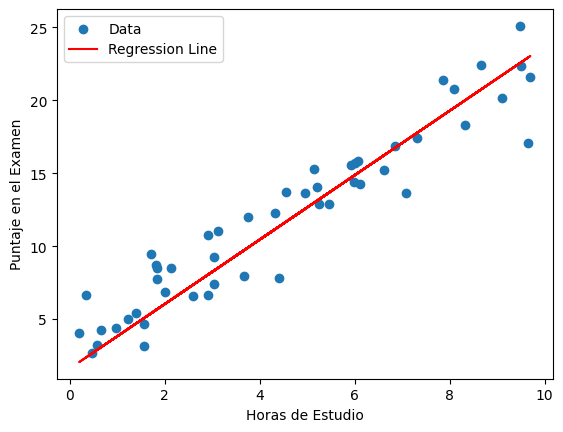

In [11]:
plt.scatter(x, y, label='Data')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.legend()
plt.show()

Después de ejecutar este código, deberías ver cómo la línea de regresión se ajusta cada vez más a los datos en cada iteración.

Este es un ejemplo simplificado para ilustrar el proceso de optimización de un modelo de regresión lineal. En aplicaciones reales, se suelen utilizar bibliotecas como Scikit-Learn para simplificar este proceso y aplicar modelos más complejos y técnicas de validación.

## **Diferentes modelos con diferentes pendientes**

Por supuesto, puedo explicarte cómo diferentes modelos de regresión lineal con diferentes pendientes pueden ajustarse a los datos. Para ello, consideremos un conjunto de datos ficticio que relaciona la cantidad de horas de estudio (`x`) con el puntaje obtenido en un examen (`y`). Vamos a explorar cómo diferentes valores de la pendiente (`m`) afectan la forma en que la línea de regresión se ajusta a los datos.

**Paso 1: Generación de Datos y Visualización**

Generemos datos ficticios y visualicemos cómo están distribuidos en un gráfico de dispersión:

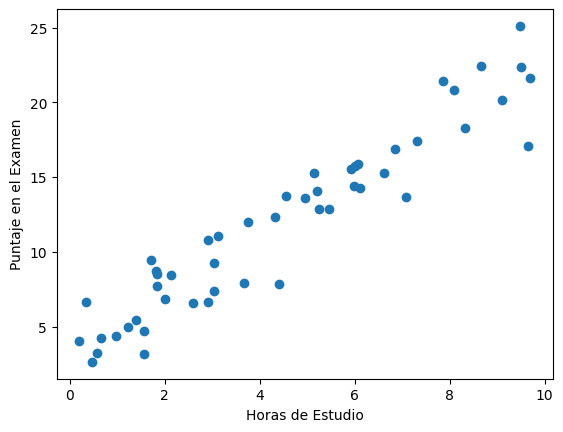

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.rand(50) * 10
y = 2 * x + 3 + np.random.randn(50) * 2  # y = 2x + 3 + ruido

plt.scatter(x, y)
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.show()

**Paso 2: Definición de la Regresión Lineal y Visualización de Modelos**

Definamos una función que ajuste una regresión lineal a los datos y visualicemos diferentes modelos con diferentes pendientes:

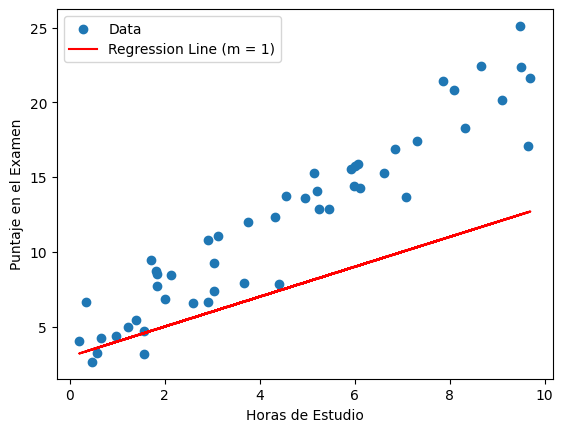

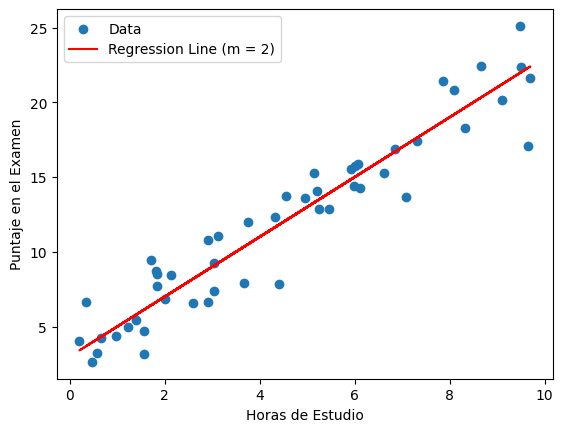

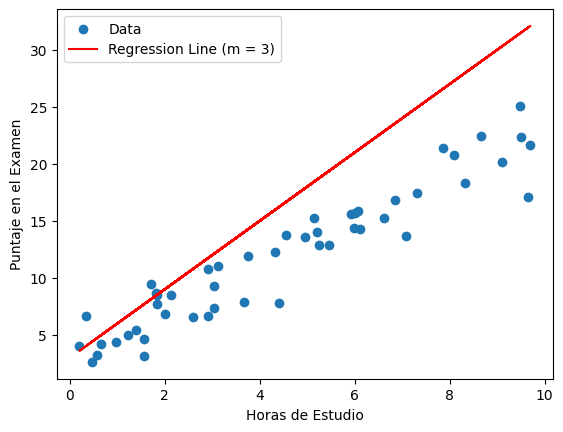

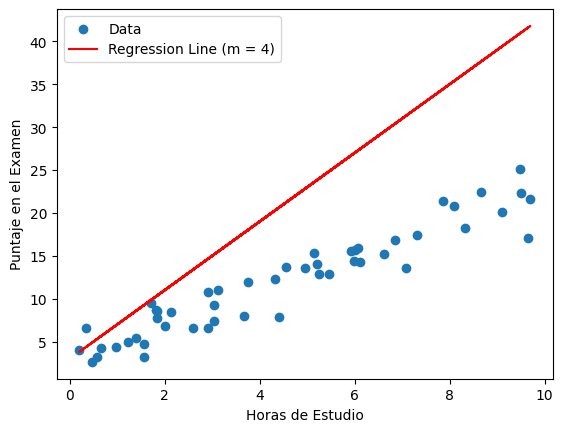

In [13]:
def plot_regression_line(x, y, m):
    plt.scatter(x, y, label='Data')
    plt.plot(x, m * x + 3, color='red', label=f'Regression Line (m = {m})')
    plt.xlabel('Horas de Estudio')
    plt.ylabel('Puntaje en el Examen')
    plt.legend()
    plt.show()

# Diferentes valores de la pendiente para los modelos
slope_values = [1, 2, 3, 4]

for slope in slope_values:
    plot_regression_line(x, y, slope)

En este ejemplo, estamos iterando a través de diferentes valores de la pendiente (`m`) y trazando la línea de regresión correspondiente para cada valor. Como resultado, verás diferentes líneas de regresión con diferentes pendientes, todas ajustándose a los mismos datos.

**Paso 3: Interpretación de Resultados**

- Cuando la pendiente (`m`) es pequeña (por ejemplo, 1), la línea de regresión es menos inclinada y se ajusta más suavemente a los datos.
- A medida que la pendiente aumenta (por ejemplo, 3), la línea de regresión se vuelve más empinada y se ajusta más cerca de los puntos.
- Si la pendiente es grande (por ejemplo, 4), la línea de regresión puede ajustarse demasiado a los datos, lo que podría llevar a un sobreajuste.

La elección de la pendiente depende del problema y los datos. Un valor de pendiente adecuado resultará en un modelo que se ajuste bien a los datos y generalice correctamente a nuevos datos. Es importante recordar que en situaciones reales, los datos pueden ser más ruidosos y complejos, lo que requerirá consideraciones más detalladas en la selección de la pendiente y otros parámetros del modelo.

## **Visualización del error (RSS)**

La visualización del error, también conocido como Residual Sum of Squares (RSS) en inglés, es una forma de analizar cuán bien se ajusta un modelo de regresión lineal a los datos observados. El RSS representa la suma de los cuadrados de las diferencias entre los valores reales y las predicciones del modelo. Visualizar el RSS puede ayudarnos a entender cómo varían los errores en función de los parámetros del modelo y a identificar cuándo el modelo se ajusta bien o mal a los datos.

**Paso 1: Generación de Datos y Ajuste del Modelo**

Comenzaremos generando datos ficticios y ajustando un modelo de regresión lineal a ellos:

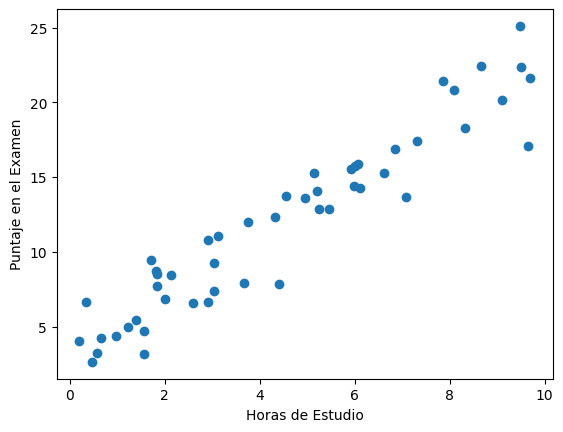

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.rand(50) * 10
y = 2 * x + 3 + np.random.randn(50) * 2  # y = 2x + 3 + ruido

plt.scatter(x, y)
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.show()

**Paso 2: Definición de la Función de Regresión Lineal**

Definimos una función que calcula las predicciones del modelo de regresión lineal:

In [15]:
def linear_regression(x, m, b):
    return m * x + b

**Paso 3: Cálculo del RSS**

Calculamos el RSS como la suma de los cuadrados de las diferencias entre los valores reales y las predicciones del modelo:

In [16]:
def calculate_rss(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

**Paso 4: Visualización del RSS**

Vamos a calcular y visualizar cómo varía el RSS en función de la pendiente (`m`) del modelo. Queremos encontrar la pendiente que minimice el RSS, lo que resultará en un mejor ajuste.

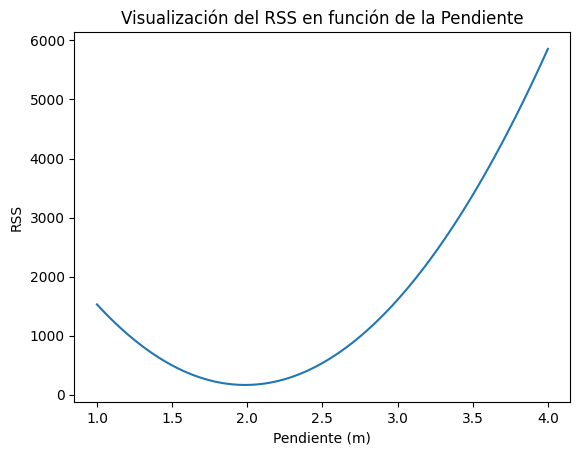

In [17]:
m_values = np.linspace(1, 4, 100)
rss_values = []

for m in m_values:
    y_pred = linear_regression(x, m, 3)
    rss = calculate_rss(y, y_pred)
    rss_values.append(rss)

plt.plot(m_values, rss_values)
plt.xlabel('Pendiente (m)')
plt.ylabel('RSS')
plt.title('Visualización del RSS en función de la Pendiente')
plt.show()

**Paso 5: Interpretación de la Visualización**

En el gráfico, verás cómo el RSS varía a medida que cambia la pendiente (`m`) del modelo. La pendiente que minimiza el RSS es aquella donde el gráfico tiene su punto más bajo. Esto corresponde a la pendiente que mejor se ajusta a los datos.

La visualización del RSS nos ayuda a comprender cómo se comporta el error en función de los parámetros del modelo. Queremos encontrar los valores de los parámetros que minimicen el RSS para lograr el mejor ajuste posible.

Este es un ejemplo básico para ilustrar cómo se visualiza el RSS en función de la pendiente. En aplicaciones reales, también es común considerar otros parámetros del modelo y utilizar técnicas de validación cruzada para seleccionar el mejor modelo.

## **Creación y derivada del error E(m)**

La creación y derivada del error E(m), también conocido como función de costo o función de error, es una parte esencial en el proceso de optimización de modelos de regresión lineal. Representa cómo el error (diferencia entre las predicciones del modelo y los valores reales) cambia en función de la pendiente (`m`) del modelo. Derivar esta función nos permite encontrar el valor de la pendiente que minimiza el error y, por lo tanto, proporciona el mejor ajuste a los datos.

**Paso 1: Generación de Datos y Ajuste del Modelo**

Generemos datos ficticios y ajustemos un modelo de regresión lineal a ellos:

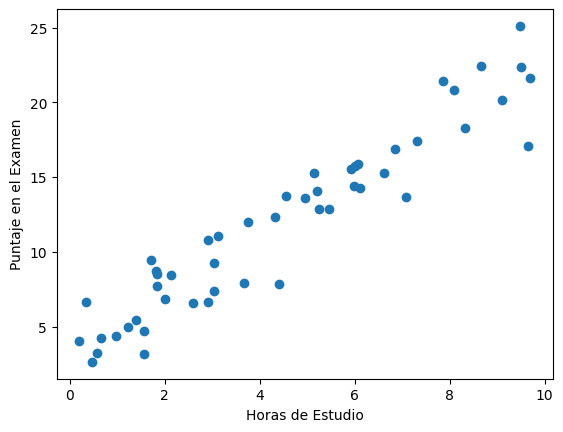

In [18]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.rand(50) * 10
y = 2 * x + 3 + np.random.randn(50) * 2  # y = 2x + 3 + ruido

plt.scatter(x, y)
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.show()

**Paso 2: Definición de la Función de Regresión Lineal y la Función de Error**

Definimos una función para calcular las predicciones del modelo y otra para calcular el error cuadrático medio (MSE):

In [19]:
def linear_regression(x, m, b):
    return m * x + b

def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

**Paso 3: Creación y Visualización de la Función de Error**

Vamos a crear una función que calcule el error (`E(m)`) en función de la pendiente (`m`) del modelo y visualicemos cómo cambia el error:

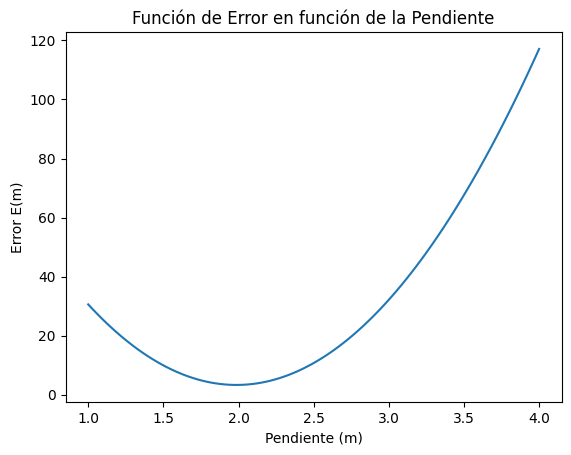

In [20]:
m_values = np.linspace(1, 4, 100)
error_values = []

for m in m_values:
    y_pred = linear_regression(x, m, 3)
    error = mean_squared_error(y, y_pred)
    error_values.append(error)

plt.plot(m_values, error_values)
plt.xlabel('Pendiente (m)')
plt.ylabel('Error E(m)')
plt.title('Función de Error en función de la Pendiente')
plt.show()

**Paso 4: Derivada de la Función de Error**

La derivada de la función de error con respecto a la pendiente (`m`) nos indica cómo cambia el error cuando ajustamos la pendiente del modelo. Esta derivada nos guía hacia la dirección en la que el error disminuye más rápido.

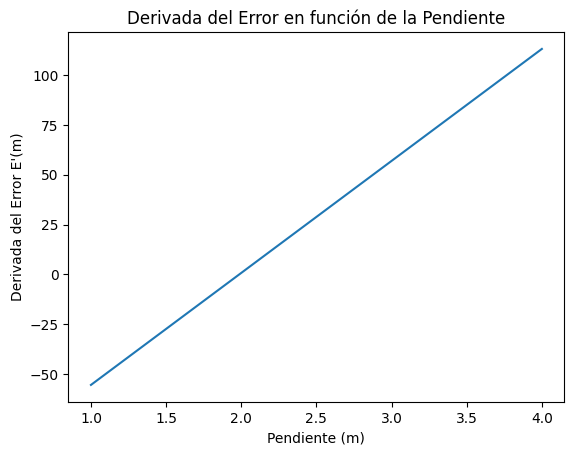

In [21]:
def error_derivative(y_true, y_pred, x):
    return -2 * np.mean(x * (y_true - y_pred))

dm_values = []
for m in m_values:
    y_pred = linear_regression(x, m, 3)
    dm = error_derivative(y, y_pred, x)
    dm_values.append(dm)

plt.plot(m_values, dm_values)
plt.xlabel('Pendiente (m)')
plt.ylabel('Derivada del Error E\'(m)')
plt.title('Derivada del Error en función de la Pendiente')
plt.show()

**Paso 5: Encontrar el Valor Óptimo de la Pendiente**

El valor óptimo de la pendiente (`m`) es aquel donde la derivada del error es cero. En otras palabras, es el punto donde el error disminuye más rápido. En el ejemplo simplificado, puedes encontrar este valor observando la derivada y buscando el punto donde cruza el eje x.

En situaciones reales, se suelen utilizar algoritmos de optimización como el Gradiente Descendente para encontrar el valor óptimo de la pendiente.

Esta es una explicación básica sobre cómo crear y derivar la función de error en función de la pendiente del modelo de regresión lineal. En problemas más complejos, los modelos pueden tener múltiples parámetros y la función de error puede ser más compleja.

## **Generalización para dos o más parámetros**

Por supuesto, puedo explicarte cómo se generaliza el proceso de optimización y visualización cuando trabajamos con modelos de regresión lineal que tienen dos o más parámetros. Consideraremos un modelo de regresión lineal con dos parámetros: la pendiente (`m1`) y la intersección en el eje y (`b`).

**Paso 1: Generación de Datos y Ajuste del Modelo**

Generemos datos ficticios y ajustemos un modelo de regresión lineal a ellos:

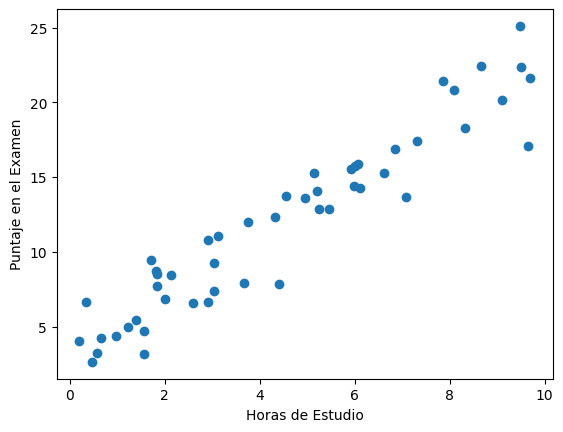

In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.rand(50) * 10
y = 2 * x + 3 + np.random.randn(50) * 2  # y = 2x + 3 + ruido

plt.scatter(x, y)
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.show()

**Paso 2: Definición de la Función de Regresión Lineal y la Función de Error**

Definimos una función para calcular las predicciones del modelo y otra para calcular el error cuadrático medio (MSE):

In [23]:
def linear_regression(x, m1, b):
    return m1 * x + b

def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

**Paso 3: Creación y Visualización de la Función de Error**

Ahora, en lugar de graficar el error en función de una sola pendiente (`m`), vamos a graficar el error en función de ambos parámetros (`m1` y `b`), creando una superficie tridimensional:

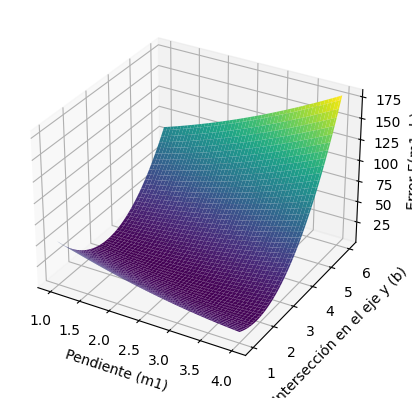

In [24]:
from mpl_toolkits.mplot3d import Axes3D

m1_values = np.linspace(1, 4, 100)
b_values = np.linspace(1, 6, 100)
M1, B = np.meshgrid(m1_values, b_values)
error_values = np.zeros_like(M1)

for i in range(len(m1_values)):
    for j in range(len(b_values)):
        y_pred = linear_regression(x, m1_values[i], b_values[j])
        error_values[i, j] = mean_squared_error(y, y_pred)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M1, B, error_values, cmap='viridis')
ax.set_xlabel('Pendiente (m1)')
ax.set_ylabel('Intersección en el eje y (b)')
ax.set_zlabel('Error E(m1, b)')
plt.show()

**Paso 4: Optimización de Parámetros**

Para encontrar el valor óptimo de los parámetros (`m1` y `b`), podemos utilizar técnicas de optimización como el Gradiente Descendente. Dado que estamos trabajando con dos parámetros, el proceso se vuelve más complejo, pero el concepto general sigue siendo el mismo.

**Paso 5: Interpretación de la Visualización**

En la superficie tridimensional, puedes visualizar cómo cambia el error en función de los dos parámetros del modelo. Queremos encontrar el punto donde el error es mínimo, lo que corresponde al mejor ajuste a los datos.

Esta explicación ha proporcionado una idea general sobre cómo se generaliza el proceso de optimización y visualización cuando trabajamos con modelos de regresión lineal con dos o más parámetros. En situaciones más complejas, se pueden utilizar técnicas de optimización más avanzadas y métodos de regularización para manejar modelos con múltiples parámetros.

## **Creación y derivada parcial del error E(m, b)**

Por supuesto, puedo explicarte cómo crear y derivar parcialmente la función de error E(m, b) en un modelo de regresión lineal con dos parámetros: la pendiente (`m`) y la intersección en el eje y (`b`). La derivada parcial nos indica cómo cambia el error en función de cada uno de los parámetros, lo que es esencial para optimizar el modelo.

**Paso 1: Generación de Datos y Ajuste del Modelo**

Generemos datos ficticios y ajustemos un modelo de regresión lineal a ellos:

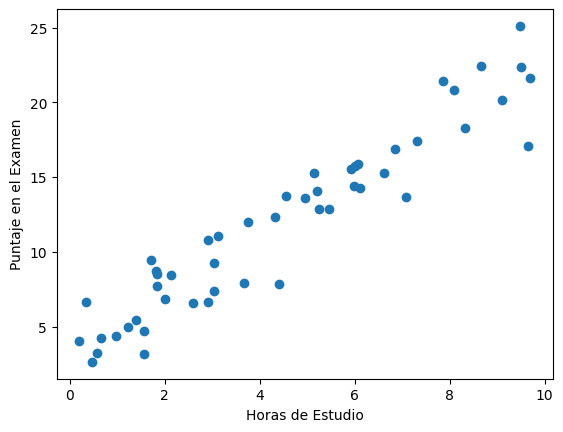

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.rand(50) * 10
y = 2 * x + 3 + np.random.randn(50) * 2  # y = 2x + 3 + ruido

plt.scatter(x, y)
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.show()

**Paso 2: Definición de la Función de Regresión Lineal y la Función de Error**

Definimos una función para calcular las predicciones del modelo y otra para calcular el error cuadrático medio (MSE):

In [26]:
def linear_regression(x, m, b):
    return m * x + b

def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

**Paso 3: Creación y Visualización de la Función de Error**

Ahora crearemos la función de error en función de ambos parámetros (`m` y `b`) y visualizaremos cómo cambia el error:

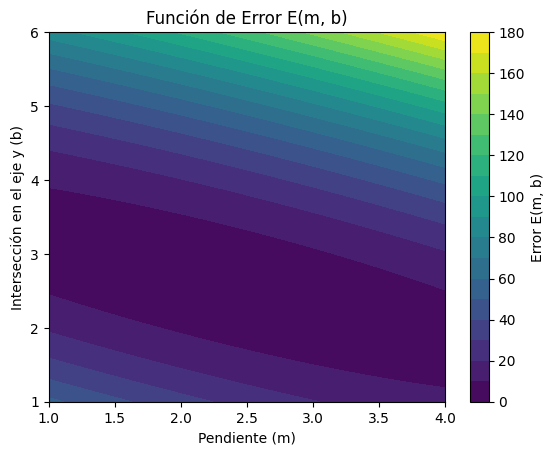

In [27]:
m_values = np.linspace(1, 4, 100)
b_values = np.linspace(1, 6, 100)
M, B = np.meshgrid(m_values, b_values)
error_values = np.zeros_like(M)

for i in range(len(m_values)):
    for j in range(len(b_values)):
        y_pred = linear_regression(x, m_values[i], b_values[j])
        error_values[i, j] = mean_squared_error(y, y_pred)

plt.contourf(M, B, error_values, cmap='viridis', levels=20)
plt.colorbar(label='Error E(m, b)')
plt.xlabel('Pendiente (m)')
plt.ylabel('Intersección en el eje y (b)')
plt.title('Función de Error E(m, b)')
plt.show()

**Paso 4: Derivadas Parciales de la Función de Error**

Ahora, calculemos las derivadas parciales del error con respecto a `m` y `b`:

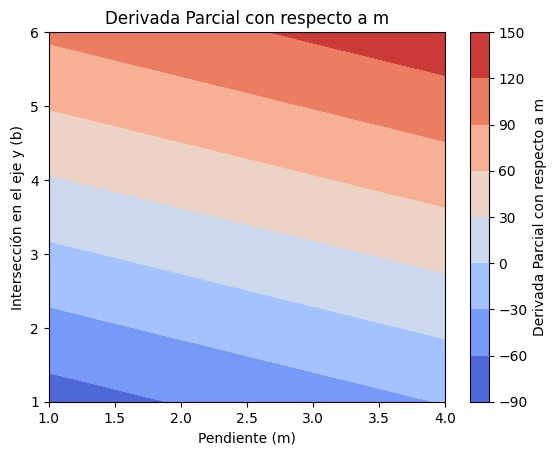

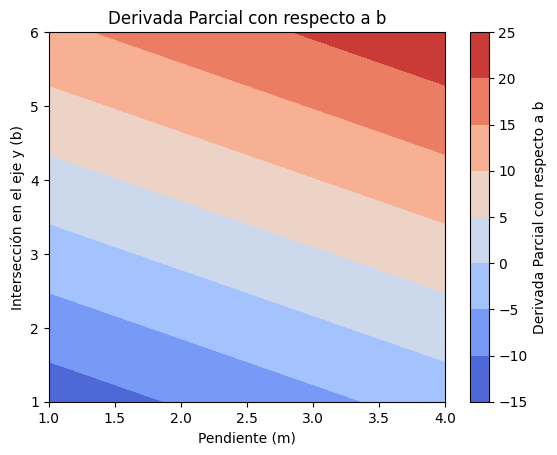

In [28]:
def error_partial_derivative_m(y_true, y_pred, x):
    return -2 * np.mean(x * (y_true - y_pred))

def error_partial_derivative_b(y_true, y_pred):
    return -2 * np.mean(y_true - y_pred)

dm_values = np.zeros_like(M)
db_values = np.zeros_like(M)

for i in range(len(m_values)):
    for j in range(len(b_values)):
        y_pred = linear_regression(x, m_values[i], b_values[j])
        dm_values[i, j] = error_partial_derivative_m(y, y_pred, x)
        db_values[i, j] = error_partial_derivative_b(y, y_pred)

plt.contourf(M, B, dm_values, cmap='coolwarm')
plt.colorbar(label='Derivada Parcial con respecto a m')
plt.xlabel('Pendiente (m)')
plt.ylabel('Intersección en el eje y (b)')
plt.title('Derivada Parcial con respecto a m')
plt.show()

plt.contourf(M, B, db_values, cmap='coolwarm')
plt.colorbar(label='Derivada Parcial con respecto a b')
plt.xlabel('Pendiente (m)')
plt.ylabel('Intersección en el eje y (b)')
plt.title('Derivada Parcial con respecto a b')
plt.show()

**Paso 5: Interpretación de la Visualización**

Las gráficas de las derivadas parciales con respecto a `m` y `b` nos muestran cómo cambia el error cuando ajustamos cada uno de los parámetros. Los colores más intensos indican las regiones donde los cambios en los parámetros tienen un mayor impacto en el error.

Las derivadas parciales nos ayudan a entender cómo ajustar los parámetros del modelo para minimizar el error. En problemas reales, los algoritmos de optimización, como el Gradiente Descendente, utilizan estas derivadas para encontrar los valores óptimos de los parámetros.

Esta explicación ha proporcionado un enfoque general sobre cómo crear y derivar parcialmente la función de error en un modelo de regresión lineal con dos parámetros. En situaciones más complejas, con modelos con más parámetros, los cálculos pueden volverse más elaborados y los algoritmos de optimización más avanzados pueden ser necesarios.

## **Pseudocódigo del gradiente descendente**

Por supuesto, aquí tienes el pseudocódigo del algoritmo de Gradiente Descendente, junto con una explicación detallada y ejemplos que incluyen gráficas para ilustrar cada paso.

**Pseudocódigo del Gradiente Descendente**

```plaintext
Función GradienteDescendente(X, y, alpha, num_iteraciones):
    Inicializar aleatoriamente los parámetros theta
    Para i en rango(num_iteraciones):
        Calcular las predicciones y_pred = X * theta
        Calcular el error = y_pred - y
        Calcular los gradientes = (X^T * error) / tamaño_de_datos
        Actualizar los parámetros theta = theta - alpha * gradientes
    Devolver theta
```

**Explicación Detallada**

1. **Inicialización de Parámetros**: Comenzamos con una inicialización aleatoria de los parámetros theta, que son los coeficientes que el algoritmo ajustará para minimizar la función de costo.

2. **Iteración del Algoritmo**: Iteramos a través de un número predefinido de iteraciones (`num_iteraciones`). En cada iteración, calculamos las predicciones `y_pred` utilizando los parámetros theta y las características de entrada `X`.

3. **Cálculo del Error**: Calculamos el error al restar las predicciones `y_pred` del valor real `y`. El error nos indica la discrepancia entre las predicciones y los valores reales.

4. **Cálculo de Gradientes**: Calculamos los gradientes, que representan la dirección en la que debemos ajustar los parámetros para reducir el error. Los gradientes se calculan tomando la transposición de las características `X` multiplicada por el error y luego dividiendo por el tamaño de los datos.

5. **Actualización de Parámetros**: Actualizamos los parámetros `theta` restando el producto del learning rate `alpha` y los gradientes. Esto ajusta los parámetros en la dirección que reduce el error.

6. **Finalización del Algoritmo**: Una vez que hemos iterado a través del número deseado de iteraciones, devolvemos los parámetros `theta` ajustados.

**Ejemplo con Gráficas**

Supongamos que tenemos un conjunto de datos que relaciona la cantidad de horas de estudio (`X`) con los puntajes en un examen (`y`). Queremos ajustar un modelo de regresión lineal utilizando el Gradiente Descendente.

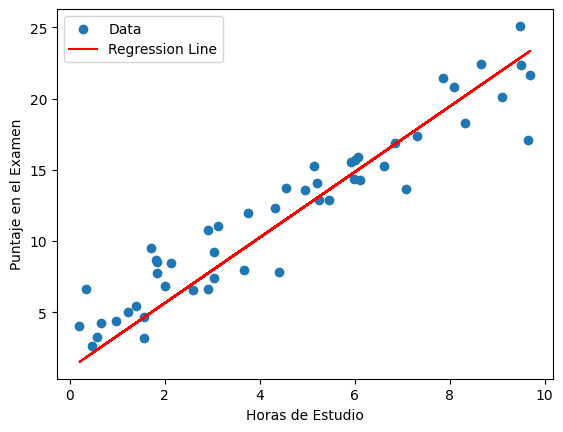

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de datos ficticios
np.random.seed(42)
X = np.random.rand(50) * 10
y = 2 * X + 3 + np.random.randn(50) * 2  # y = 2X + 3 + ruido

# Agregamos una columna de unos a X para considerar el término independiente
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Inicialización de parámetros y hiperparámetros
theta = np.random.randn(2, 1)
alpha = 0.01
num_iteraciones = 100

# Gradiente Descendente
for i in range(num_iteraciones):
    y_pred = X_b.dot(theta)
    error = y_pred - y.reshape(-1, 1)
    gradientes = X_b.T.dot(error) / len(X)
    theta = theta - alpha * gradientes

# Gráfica de los datos y la línea ajustada por el modelo
plt.scatter(X, y, label='Data')
plt.plot(X, X_b.dot(theta), color='red', label='Regression Line')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.legend()
plt.show()

Este ejemplo muestra cómo el Gradiente Descendente ajusta iterativamente los parámetros del modelo para minimizar el error y obtener la línea de regresión que mejor se ajusta a los datos. Cada iteración mueve la línea de regresión más cerca de los puntos de datos y, al final, obtenemos un ajuste razonable a los datos observados.

Ten en cuenta que este es un ejemplo simplificado y que, en aplicaciones más complejas, se suelen considerar otros detalles, como la normalización de datos, la validación cruzada y el ajuste de hiperparámetros.

## **Programación del gradiente descendente**

Por supuesto, puedo guiarte a través de la programación del algoritmo de Gradiente Descendente en Python, junto con ejemplos y gráficas para ilustrar cada paso.

**Programación del Gradiente Descendente en Python**

Aquí tienes el código para implementar el algoritmo de Gradiente Descendente en un modelo de regresión lineal simple:

Iteration 1/100 - Cost: 176.47025720335813
Iteration 2/100 - Cost: 36.34429444894749
Iteration 3/100 - Cost: 11.08220615977718
Iteration 4/100 - Cost: 6.510906307092021
Iteration 5/100 - Cost: 5.666895729198242
Iteration 6/100 - Cost: 5.494518910375942
Iteration 7/100 - Cost: 5.443354783676386
Iteration 8/100 - Cost: 5.414252812933018
Iteration 9/100 - Cost: 5.389350324180397
Iteration 10/100 - Cost: 5.365427140360474
Iteration 11/100 - Cost: 5.341900681653588
Iteration 12/100 - Cost: 5.31866351002009
Iteration 13/100 - Cost: 5.295693803512961
Iteration 14/100 - Cost: 5.2729851902875735
Iteration 15/100 - Cost: 5.250534109211305
Iteration 16/100 - Cost: 5.228337532803284
Iteration 17/100 - Cost: 5.2063925567550875
Iteration 18/100 - Cost: 5.184696325684119
Iteration 19/100 - Cost: 5.163246019456409
Iteration 20/100 - Cost: 5.142038850423277
Iteration 21/100 - Cost: 5.121072062627323
Iteration 22/100 - Cost: 5.1003429313665105
Iteration 23/100 - Cost: 5.07984876282608
Iteration 24/100 -

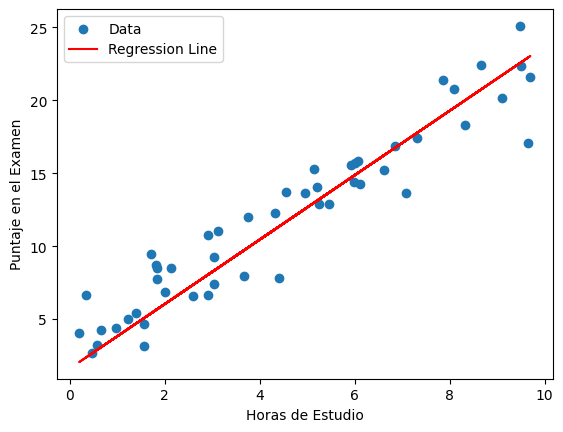

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de datos ficticios
np.random.seed(42)
x = np.random.rand(50) * 10
y = 2 * x + 3 + np.random.randn(50) * 2  # y = 2x + 3 + ruido

# Inicialización de parámetros y hiperparámetros
m = 0.0  # Pendiente
b = 0.0  # Intersección en el eje y
learning_rate = 0.01
num_iterations = 100

# Implementación del Gradiente Descendente
for i in range(num_iterations):
    y_pred = m * x + b
    dm = -2 * np.mean(x * (y - y_pred))
    db = -2 * np.mean(y - y_pred)
    m -= learning_rate * dm
    b -= learning_rate * db
    cost = ((y - y_pred) ** 2).mean()
    print(f"Iteration {i+1}/{num_iterations} - Cost: {cost}")

# Gráfica de los datos y la línea ajustada por el modelo
plt.scatter(x, y, label='Data')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.legend()
plt.show()

**Explicación Detallada**

1. **Generación de Datos Ficticios**: Creamos un conjunto de datos ficticios que relacionan las horas de estudio (`x`) con los puntajes en un examen (`y`).

2. **Inicialización de Parámetros y Hiperparámetros**: Inicializamos los parámetros `m` y `b` (pendiente e intersección en el eje y) en cero, y definimos la tasa de aprendizaje (`learning_rate`) y el número de iteraciones (`num_iterations`).

3. **Implementación del Gradiente Descendente**: Iteramos a través del número de iteraciones especificado. En cada iteración, calculamos las predicciones `y_pred` utilizando los parámetros `m` y `b`, y luego calculamos los gradientes (`dm` y `db`) que indican cómo ajustar los parámetros para reducir el error.

4. **Actualización de Parámetros**: Actualizamos los parámetros `m` y `b` restando los gradientes multiplicados por la tasa de aprendizaje. Esto ajusta los parámetros en la dirección que reduce el error.

5. **Cálculo del Costo**: Calculamos el costo, que es el error cuadrático medio entre las predicciones y los valores reales.

6. **Gráfica del Modelo Ajustado**: Graficamos los datos y la línea de regresión ajustada por el modelo al final de las iteraciones.

**Interpretación de Resultados**

A medida que el algoritmo avanza a través de las iteraciones, la línea de regresión se ajusta cada vez más a los datos. El costo debería disminuir en cada iteración, lo que indica que el modelo está mejorando su ajuste a los datos.

Recuerda que este ejemplo es simplificado y se basa en datos ficticios. En aplicaciones reales, se utilizan bibliotecas como Scikit-Learn para facilitar la implementación y se consideran aspectos como la normalización de datos, la validación cruzada y la evaluación adecuada del modelo.

## **Visualización del descenso del error**

La visualización del descenso del error es una técnica que nos permite observar cómo disminuye el error a lo largo de las iteraciones del algoritmo de Gradiente Descendente. Esto nos ayuda a comprender cómo el modelo se ajusta a los datos a medida que se actualizan los parámetros en cada iteración. Vamos a realizar una explicación detallada con ejemplos y gráficas.

**Paso 1: Generación de Datos y Ajuste Inicial**

Generemos datos ficticios y ajustemos un modelo de regresión lineal inicial a ellos:

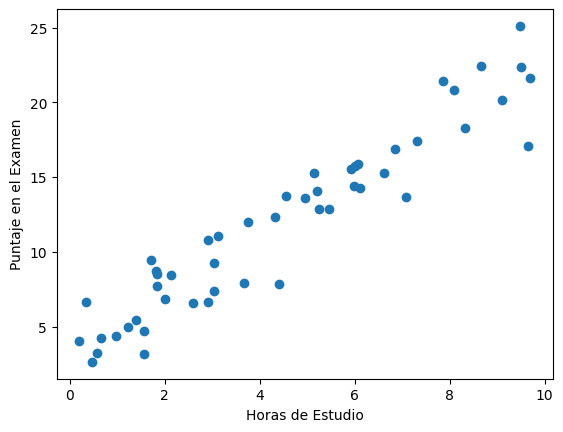

In [31]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.rand(50) * 10
y = 2 * x + 3 + np.random.randn(50) * 2  # y = 2x + 3 + ruido

plt.scatter(x, y)
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.show()

**Paso 2: Implementación del Gradiente Descendente con Registro de Errores**

Implementemos el algoritmo de Gradiente Descendente, registrando los valores del error en cada iteración:

In [32]:
# Inicialización de parámetros y hiperparámetros
m = 0.0  # Pendiente
b = 0.0  # Intersección en el eje y
learning_rate = 0.01
num_iterations = 100

# Listas para registrar los errores y las iteraciones
errors = []

# Implementación del Gradiente Descendente con registro de errores
for i in range(num_iterations):
    y_pred = m * x + b
    error = ((y - y_pred) ** 2).mean()
    errors.append(error)
    dm = -2 * np.mean(x * (y - y_pred))
    db = -2 * np.mean(y - y_pred)
    m -= learning_rate * dm
    b -= learning_rate * db

**Paso 3: Visualización del Descenso del Error**

Graficaremos cómo disminuye el error a lo largo de las iteraciones:

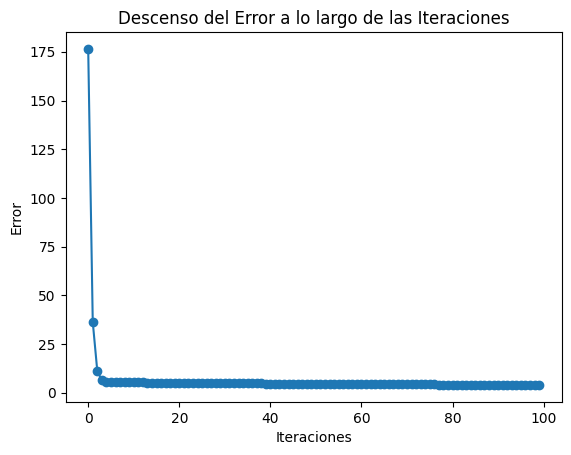

In [33]:
plt.plot(range(num_iterations), errors, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Descenso del Error a lo largo de las Iteraciones')
plt.show()

**Interpretación de la Visualización**

La gráfica del descenso del error nos muestra cómo el error disminuye a medida que avanzamos a través de las iteraciones del algoritmo. En las primeras iteraciones, el error disminuirá significativamente a medida que el modelo se ajusta rápidamente a los datos. Con el tiempo, el descenso del error será más gradual, ya que el ajuste del modelo se vuelve más sutil.

Es importante observar que si el error no disminuye a lo largo de las iteraciones o aumenta en algunas iteraciones, podría ser un indicativo de que el learning rate es demasiado alto y el algoritmo "salta" el mínimo en la función de costo.

Esta visualización es una herramienta valiosa para verificar que el algoritmo de Gradiente Descendente esté funcionando correctamente y para comprender cómo el modelo se ajusta a los datos a medida que se actualizan los parámetros.

| **Inicio** | **Siguiente 2** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏩](./2_%20Redes_Neuronales.ipynb)|